imports

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

Paths

In [ ]:
X=[]
Z=[]
IMG_SIZE=256
ATELECTASIS_DIR='/content/drive/MyDrive/For Project/Classification/Training/1. ATELECTASIS'
PLEURAL_EFFUSION_DIR='/content/drive/MyDrive/For Project/Classification/Training/10. PLEURAL EFFUSION'
CARDIOMEGALY_DIR='/content/drive/MyDrive/For Project/Classification/Training/2. CARDIOMEGALY'
CONSOLIDATION_DIR='/content/drive/MyDrive/For Project/Classification/Training/3. CONSOLIDATION'
EDEMA_DIR='/content/drive/MyDrive/For Project/Classification/Training/4. EDEMA'
NO_FINDING_DIR='/content/drive/MyDrive/For Project/Classification/Training/9. NO FINDING'

Create Labels function

In [ ]:
def assign_label(img,flower_type):
    return flower_type

Append images in X list

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

Pass images to the function

In [ ]:
make_train_data('ATELECTASIS',ATELECTASIS_DIR)
make_train_data('PLEURAL_EFFUSION',PLEURAL_EFFUSION_DIR)
make_train_data('CARDIOMEGALY',CARDIOMEGALY_DIR)
make_train_data('CONSOLIDATION',CONSOLIDATION_DIR)
make_train_data('EDEMA',EDEMA_DIR)
make_train_data('NO_FINDING',NO_FINDING_DIR)


100%|██████████| 295/295 [00:05<00:00, 54.69it/s]


Label Encoding the Y array (i.e. atelectasis->0, pleural_effusion->1

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,6)
X=np.array(X)
X=X/255 #normalization

splitting into training and validation

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)

BEFORE SHUFFLING

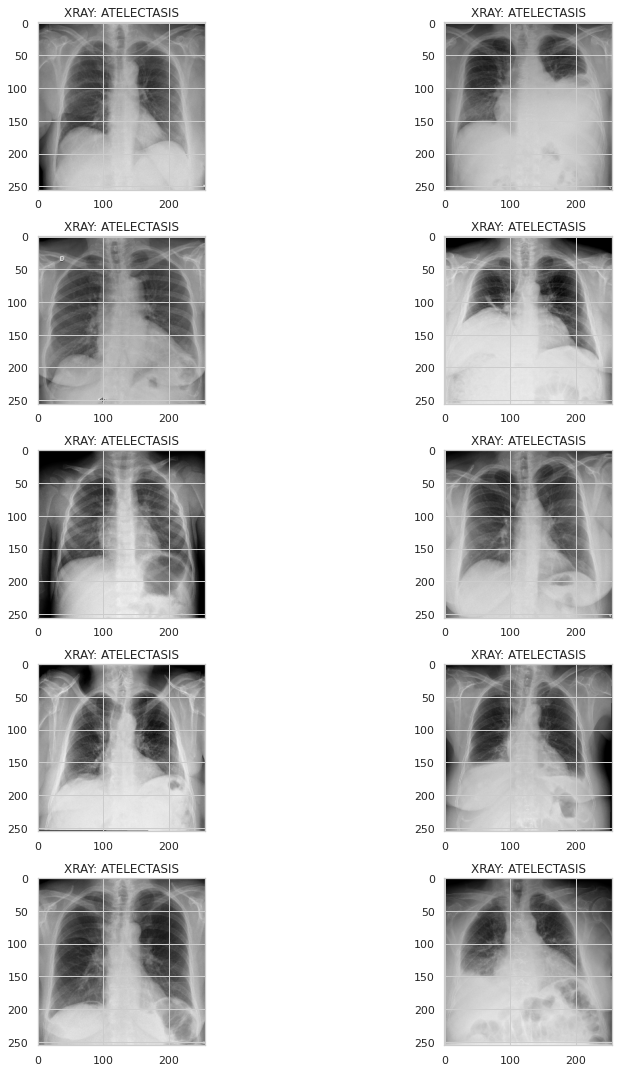

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
l=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('XRAY: '+Z[l])
        l=l+1
plt.tight_layout()

In [ ]:
print(X)
print(Z)

[[[[0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.07843137 0.07843137 0.07843137]
   [0.0745098  0.0745098  0.0745098 ]
   [0.06666667 0.06666667 0.06666667]]

  [[0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.01568627 0.01568627 0.01568627]
   ...
   [0.09411765 0.09411765 0.09411765]
   [0.09019608 0.09019608 0.09019608]
   [0.08235294 0.08235294 0.08235294]]

  [[0.01176471 0.01176471 0.01176471]
   [0.02352941 0.02352941 0.02352941]
   [0.03529412 0.03529412 0.03529412]
   ...
   [0.10588235 0.10588235 0.10588235]
   [0.10196078 0.10196078 0.10196078]
   [0.09411765 0.09411765 0.09411765]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.38823529 0.38823529 0.38823529]
   [0.29411765 0.29411765 0.29411765]
   [0.14901961 0.14901961 0.14901961]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
##X = tf.random.shuffle(X, seed=42)
##Z = tf.random.shuffle(Z, seed=42)
from sklearn.utils import shuffle

X, Z = shuffle(X, Z)

AFTER SHUFFLING

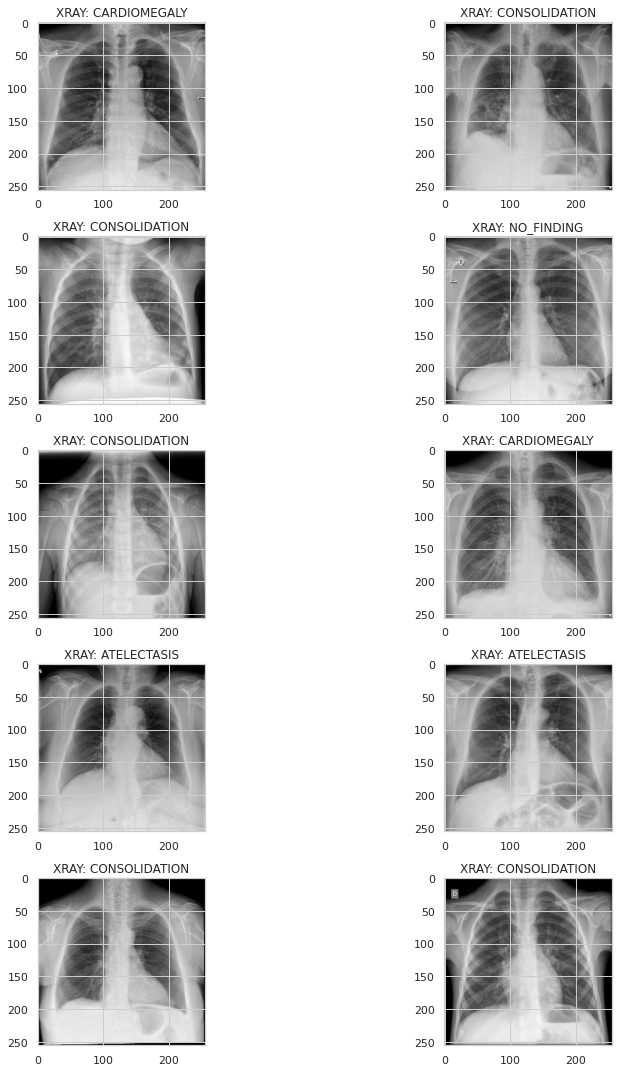

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
l=0
for i in range(5):
    for j in range (2):
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('XRAY: '+Z[l])
        l=l+1
plt.tight_layout()

CNN architecture

In [ ]:
from keras import regularizers
from keras.layers import MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Input
from keras import Model
from keras.layers import Rescaling

#Creating the model
model = Sequential()
#Creating the model
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))
 

model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(6, activation = "softmax"))

In [ ]:
from tensorflow import keras
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 16)       

CALLBACKS

In [ ]:
import math
import numpy as np
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2

In [ ]:
major_revision, minor_revision = 1,1
model_save_path = '/content/'
log_save_path = '/content/'

file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'val_categorical_accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')
    
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)
    
    
text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['val_categorical_accuracy'])
)
    
my_callbacks = [learning_rate_callback]

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1125, 256, 256, 3)
(1125, 6)


Data Augmentation

In [ ]:

train_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
# data augmentation

#train_datagen.fit(x_train)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
test_datagen.fit(x_test)
#test_set = test_datagen.flow_from_directory(
#    '/content/drive/MyDrive/For Project/Classification/Validation',
#    target_size=(224, 224),
#    batch_size=32,
#    class_mode='categorical',
#)
#train_generator = train_datagen.flow_from_directory(
#    '/content/drive/MyDrive/For Project/Classification/Training',
#    target_size=(256, 256),
#    batch_size=32,
#    class_mode='categorical',
#    shuffle=True,
#    seed=2020,
#    interpolation='nearest',
#)
tsdata = ImageDataGenerator()
trdata = ImageDataGenerator()  # randomly flip images)
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/For Project/Classification/Training",target_size=(256,256))
#tsdata = ImageDataGenerator(rescale=1. / 255)
testdata = trdata.flow_from_directory(directory="/content/drive/MyDrive/For Project/Classification/Validation", target_size=(256,256))

Found 1500 images belonging to 6 classes.
Found 500 images belonging to 6 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = tf.keras.callbacks.ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='min')

model.fit(x=x_train, y=y_train, epochs=100, # one forward/backward pass of training dataages comprising of one epoch
                    validation_data= (x_test,y_test),callbacks=[early,checkpoint]
)

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 1.6915 - accuracy: 0.2187
Epoch 1: val_accuracy improved from -inf to 0.19200, saving model to vgg16_1.h5
36/36 [==============================] - 6s 67ms/step - loss: 1.6915 - accuracy: 0.2187 - val_loss: 1.6915 - val_accuracy: 0.1920
Epoch 2/100
35/36 [============================>.] - ETA: 0s - loss: 1.6448 - accuracy: 0.2402
Epoch 2: val_accuracy improved from 0.19200 to 0.28533, saving model to vgg16_1.h5
36/36 [==============================] - 1s 41ms/step - loss: 1.6447 - accuracy: 0.2409 - val_loss: 1.6726 - val_accuracy: 0.2853
Epoch 3/100
35/36 [============================>.] - ETA: 0s - loss: 1.6111 - accuracy: 0.2705
Epoch 3: val_accuracy did not improve from 0.28533
36/36 [==============================] - 1s 38ms/step - loss: 1.6112 - accuracy: 0.2702 - val_loss: 1.6340 - val_accuracy: 0.2827
Epoch 4/100
35/36 [============================>.] - ETA: 0s - loss: 1.5860 - accuracy: 0.3009
Epoch 4: val_acc

(375, 6)


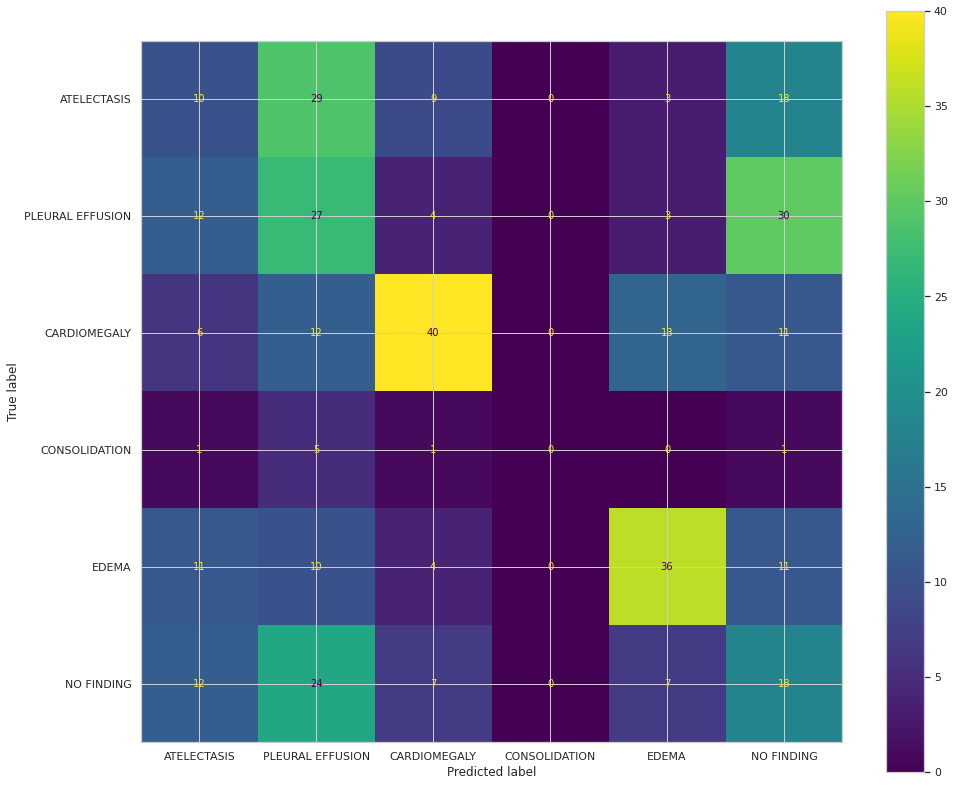

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

my_predictions = model.predict(x_test)
print(my_predictions.shape)


cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(y_test, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=['ATELECTASIS','PLEURAL EFFUSION', 'CARDIOMEGALY', 'CONSOLIDATION', 'EDEMA', 'NO FINDING'])
fig, ax = plt.subplots(figsize=(14,14))
cmd.plot(ax=ax)

  
#plt.show()